In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('/kaggle/input/phishingemails/Phishing_Email.csv')

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [3]:
df.shape

(18650, 3)

# 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.rename(columns={'Email Text':'email','Email Type':'target'},inplace=True)
df.sample(5)

,email,target
13766,Targeted email marketing works! There's no wa...,Phishing Email
17964,"Robert Harley:\n>>BTW, I wasn't aware that the...",Safe Email
16459,Additional Comments From felicity@kluge.net 20...,Safe Email
17088,"c . | alis soft , tabs , fast shipping cialis ...",Phishing Email
5780,Norton AD\nÂ \n ATTENTION:\n T...,Phishing Email


In [8]:
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [9]:
df.head(5)

,email,target
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1
1,the other side of * galicismos * * galicismo *...,1
2,re : equistar deal tickets are you still avail...,1
3,\nHello I am your hot lil horny toy.\n I am...,0
4,software at incredibly low prices ( 86 % lower...,0


In [10]:
#missing Value
df.isnull().sum()

email     16
target     0
dtype: int64

In [11]:
df.drop(df[df['email'] == 'empty'].index, inplace=True)

In [12]:
df=df.dropna()

In [13]:
df.isnull().sum()

email     0
target    0
dtype: int64

In [14]:
#ckeck duplicate
df.duplicated().sum()

565

In [15]:
#removing duplicate
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(17536, 2)

# 2.EDA

In [18]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['target'].value_counts()

target
1    10979
0     6557
Name: count, dtype: int64

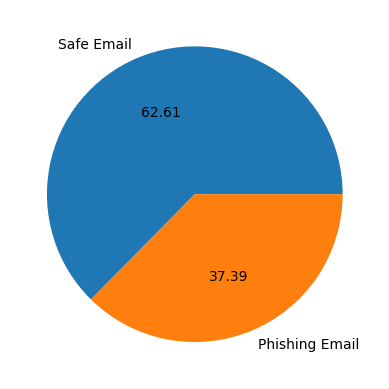

In [20]:
plt.pie(df['target'].value_counts(),labels=['Safe Email','Phishing Email'],autopct='%0.2f')
plt.show()

In [21]:
df['len_characters']=df['email'].apply(len)
df.head()

,email,target,len_characters
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030
1,the other side of * galicismos * * galicismo *...,1,479
2,re : equistar deal tickets are you still avail...,1,1245
3,\nHello I am your hot lil horny toy.\n I am...,0,688
4,software at incredibly low prices ( 86 % lower...,0,441


In [22]:
#num of words
df['num_words']=df['email'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df.head()

,email,target,len_characters,num_words
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230
1,the other side of * galicismos * * galicismo *...,1,479,91
2,re : equistar deal tickets are you still avail...,1,1245,305
3,\nHello I am your hot lil horny toy.\n I am...,0,688,124
4,software at incredibly low prices ( 86 % lower...,0,441,91


In [24]:
df['num_sentences']=df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df['mean_word_length'] = df['email'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [26]:
df['mean_sent_length'] = df['email'].map(lambda rev: np.mean([len(sent) for sent in nltk.sent_tokenize(rev)]))


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [27]:
df.head()

,email,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,3.482609,102.100000
1,the other side of * galicismos * * galicismo *...,1,479,91,7,4.274725,67.571429
2,re : equistar deal tickets are you still avail...,1,1245,305,8,3.085246,154.750000
3,\nHello I am your hot lil horny toy.\n I am...,0,688,124,8,5.500000,82.125000
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,3.857143,33.000000


In [28]:
df[['len_characters','num_words','num_sentences','mean_word_length','mean_sent_length']].describe()

,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
count,1.753600e+04,1.753600e+04,17536.000000,17535.000000,17535.000000
mean,2.862152e+03,5.854019e+02,33.415716,4.661986,124.876000
std,1.287124e+05,2.737165e+04,1686.554778,3.911179,620.725842
min,1.000000e+00,0.000000e+00,0.000000,1.001691,1.805369
25%,4.350000e+02,8.900000e+01,5.000000,3.574758,61.146429
50%,9.160000e+02,1.870000e+02,10.000000,4.173098,94.000000
75%,1.946000e+03,3.930000e+02,19.000000,5.067014,137.000000
max,1.703669e+07,3.623486e+06,223247.000000,412.875000,64816.500000


In [29]:
df[df['target']==0][['len_characters','num_words','num_sentences','mean_word_length','mean_sent_length']].describe()

,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
count,6557.000000,6557.000000,6557.000000,6556.000000,6556.000000
mean,1697.857557,337.030807,20.874638,4.525605,126.715504
std,3468.276466,630.771235,52.540973,5.668309,1001.700018
min,1.000000,0.000000,0.000000,1.001691,1.805369
25%,399.000000,81.000000,6.000000,3.521357,47.750000
50%,764.000000,156.000000,10.000000,4.042129,73.600000
75%,1670.000000,327.000000,20.000000,4.873077,116.116667
max,129635.000000,13242.000000,3032.000000,412.875000,64816.500000


In [30]:
df[df['target']==1][['len_characters','num_words','num_sentences','mean_word_length','mean_sent_length']].describe()

,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
count,1.097900e+04,1.097900e+04,10979.000000,10979.000000,10979.000000
mean,3.557504e+03,7.337369e+02,40.905638,4.743424,123.777558
std,1.626455e+05,3.458903e+04,2131.109391,2.286983,127.520538
min,7.000000e+00,1.000000e+00,1.000000,1.275000,3.250000
25%,4.700000e+02,9.600000e+01,5.000000,3.622314,71.952770
50%,1.021000e+03,2.100000e+02,9.000000,4.260355,104.575472
75%,2.055000e+03,4.210000e+02,19.000000,5.166667,146.494444
max,1.703669e+07,3.623486e+06,223247.000000,57.000000,6791.000000


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# plt.figure(figsize=(12,6))
# sns.histplot(df[df['target']==0]['len_characters'],bins=1000,kde=True)
# plt.ylim(0, 1000)
# plt.xlim(0,8000)
# plt.show()
# plt.figure(figsize=(12,6))
# sns.histplot(df[df['target']==1]['len_characters'],bins=1000,kde=True)
# plt.ylim(0, 100000)
# plt.xlim(0,80000)
# plt.show()

In [33]:
dff=df.drop('email',axis=1)

dff

,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
0,1,1030,230,10,3.482609,102.100000
1,1,479,91,7,4.274725,67.571429
2,1,1245,305,8,3.085246,154.750000
3,0,688,124,8,5.500000,82.125000
4,0,441,91,13,3.857143,33.000000
...,...,...,...,...,...,...
18644,1,4409,959,52,4.405941,83.461538
18645,0,237,45,7,4.288889,33.000000
18646,1,477,99,9,3.828283,52.111111
18647,1,1214,253,13,3.802372,92.461538


In [34]:
dff

,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length
0,1,1030,230,10,3.482609,102.100000
1,1,479,91,7,4.274725,67.571429
2,1,1245,305,8,3.085246,154.750000
3,0,688,124,8,5.500000,82.125000
4,0,441,91,13,3.857143,33.000000
...,...,...,...,...,...,...
18644,1,4409,959,52,4.405941,83.461538
18645,0,237,45,7,4.288889,33.000000
18646,1,477,99,9,3.828283,52.111111
18647,1,1214,253,13,3.802372,92.461538


<Axes: >

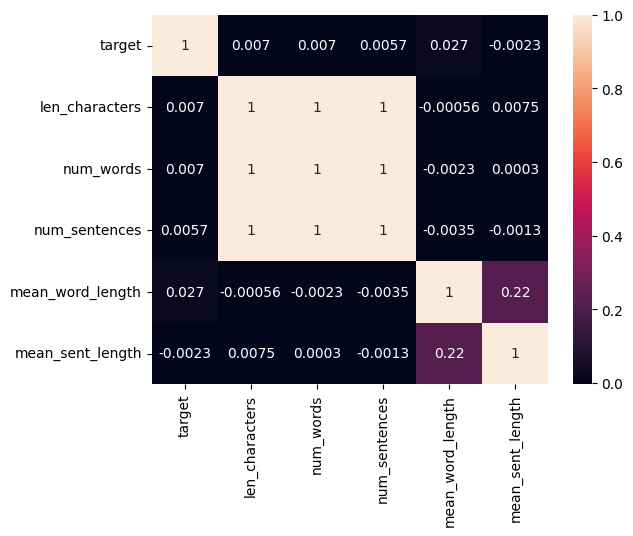

In [35]:
sns.heatmap(dff.corr(),annot=True)

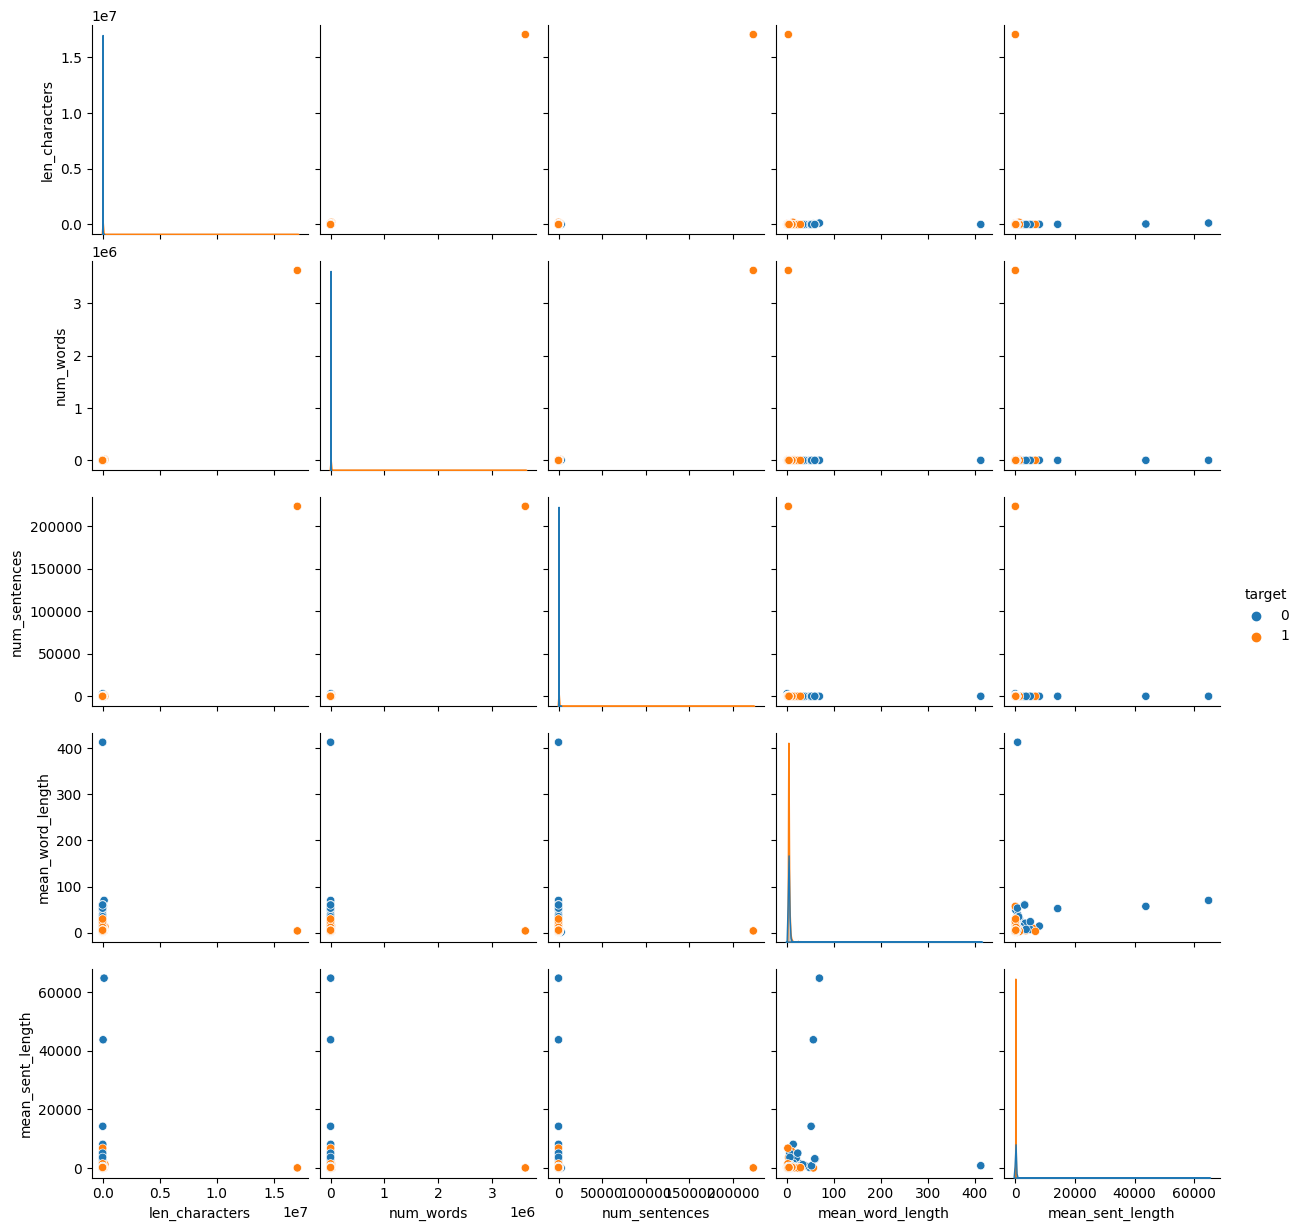

In [36]:
sns.pairplot(dff,hue='target')

# Data Preprocessing
1. Lowercase
1. Tokenization
1. Removing Special Charecter
1. Removing Stop Words and Puntuation
1. Stemming

In [37]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
df['transformed_text'] = df['email'].apply(transform_text)

In [41]:
df.head()

,email,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,3.482609,102.100000,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,1,479,91,7,4.274725,67.571429,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,1,1245,305,8,3.085246,154.750000,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,0,688,124,8,5.500000,82.125000,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,3.857143,33.000000,softwar incred low price 86 lower draperi seve...


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

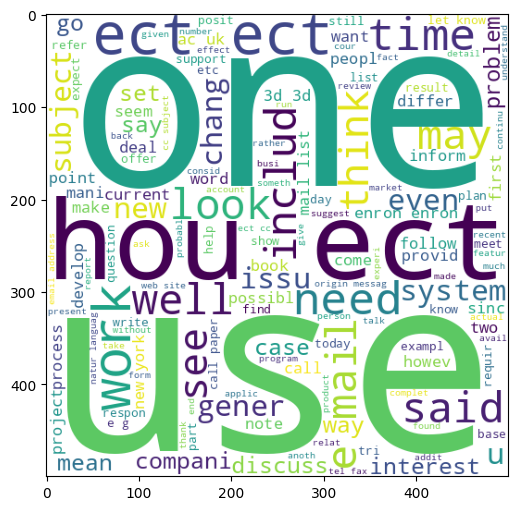

In [43]:
safe_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(safe_wc)


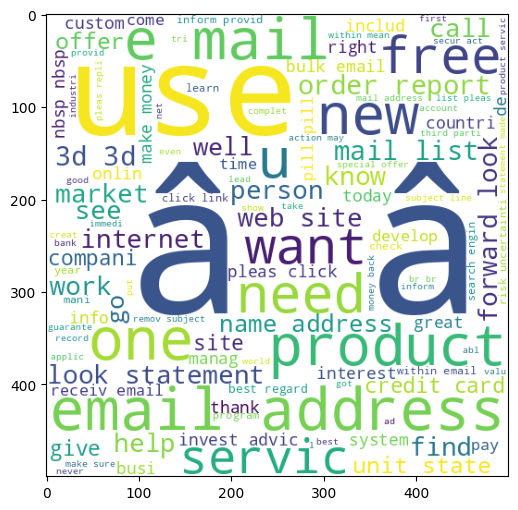

In [44]:
phishing_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(phishing_wc)



In [45]:
df.head()

,email,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,3.482609,102.100000,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,1,479,91,7,4.274725,67.571429,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,1,1245,305,8,3.085246,154.750000,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,0,688,124,8,5.500000,82.125000,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,3.857143,33.000000,softwar incred low price 86 lower draperi seve...


In [46]:
safe_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        safe_corpus.append(word)
        

In [47]:
len(safe_corpus)

3581034

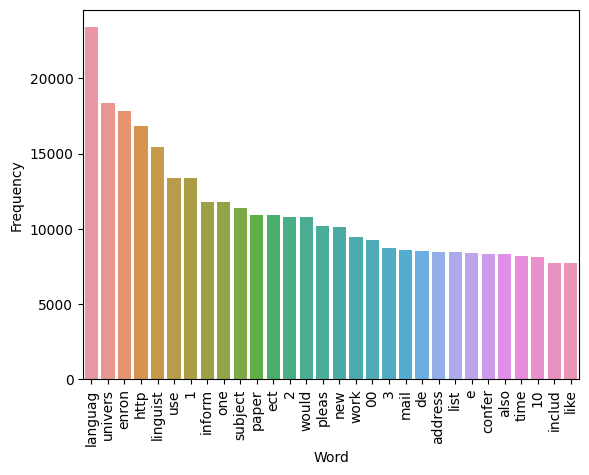

In [48]:
from collections import Counter
counter_df = pd.DataFrame(Counter(safe_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use Seaborn barplot
sns.barplot(x='Word', y='Frequency', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()

In [49]:
phishing_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        phishing_corpus.append(word)

In [50]:
len(phishing_corpus)

1037783

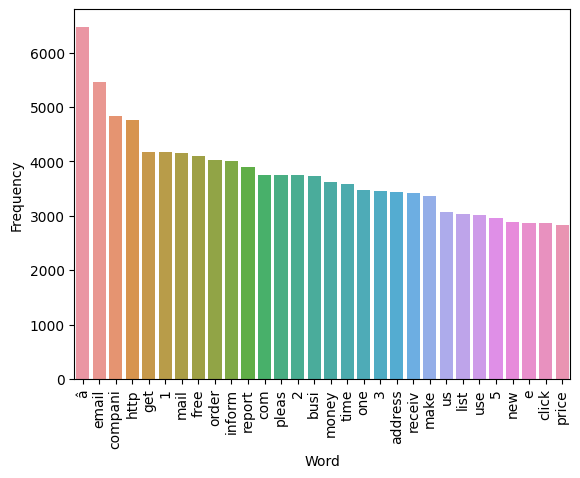

In [51]:
counter_df = pd.DataFrame(Counter(phishing_corpus).most_common(30), columns=['Word', 'Frequency'])

# Use Seaborn barplot
sns.barplot(x='Word', y='Frequency', data=counter_df)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.head()

,email,target,len_characters,num_words,num_sentences,mean_word_length,mean_sent_length,transformed_text
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",1,1030,230,10,3.482609,102.100000,6 1100 disc uniformitarian 1086 sex lang dick ...
1,the other side of * galicismos * * galicismo *...,1,479,91,7,4.274725,67.571429,side galicismo galicismo spanish term name imp...
2,re : equistar deal tickets are you still avail...,1,1245,305,8,3.085246,154.750000,equistar deal ticket still avail assist robert...
3,\nHello I am your hot lil horny toy.\n I am...,0,688,124,8,5.500000,82.125000,hello hot lil horni toy one dream open mind pe...
4,software at incredibly low prices ( 86 % lower...,0,441,91,13,3.857143,33.000000,softwar incred low price 86 lower draperi seve...


In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [54]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [55]:
X.shape

(17536, 3000)

In [56]:
y = df['target'].values

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [61]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9104903078677309
[[1212   93]
 [ 221 1982]]
0.9551807228915663


In [62]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9572405929304447
[[1207   98]
 [  52 2151]]
0.9564250778123611


In [63]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8968072976054732
[[1274   31]
 [ 331 1872]]
0.9837099316868103


In [64]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier



In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [67]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9723489167616876, 0.9769021739130435)

In [69]:


accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)



For  SVC
Accuracy -  0.9723489167616876
Precision -  0.9769021739130435
For  KN
Accuracy -  0.571835803876853
Precision -  0.986130374479889
For  NB
Accuracy -  0.9572405929304447
Precision -  0.9564250778123611
For  DT
Accuracy -  0.8107183580387686
Precision -  0.7969895793130065
For  LR
Accuracy -  0.9692132269099202
Precision -  0.9741964689904934
For  RF
Accuracy -  0.9692132269099202
Precision -  0.9763528876762164
For  AdaBoost
Accuracy -  0.9124857468643102
Precision -  0.9446529080675422
For  BgC
Accuracy -  0.951254275940707
Precision -  0.9643510054844607
For  ETC
Accuracy -  0.9737742303306728
Precision -  0.9752363800090049
For  GBDT
Accuracy -  0.9016533637400228
Precision -  0.8804258804258804
For  xgb
Accuracy -  0.9561003420752565
Precision -  0.965893587994543


In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [71]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.571836,0.986130
0,SVC,0.972349,0.976902
5,RF,0.969213,0.976353
8,ETC,0.973774,0.975236
4,LR,0.969213,0.974196
10,xgb,0.956100,0.965894
7,BgC,0.951254,0.964351
2,NB,0.957241,0.956425
6,AdaBoost,0.912486,0.944653
9,GBDT,0.901653,0.880426


In [72]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [73]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.571836
1,SVC,Accuracy,0.972349
2,RF,Accuracy,0.969213
3,ETC,Accuracy,0.973774
4,LR,Accuracy,0.969213
5,xgb,Accuracy,0.956100
6,BgC,Accuracy,0.951254
7,NB,Accuracy,0.957241
8,AdaBoost,Accuracy,0.912486
9,GBDT,Accuracy,0.901653


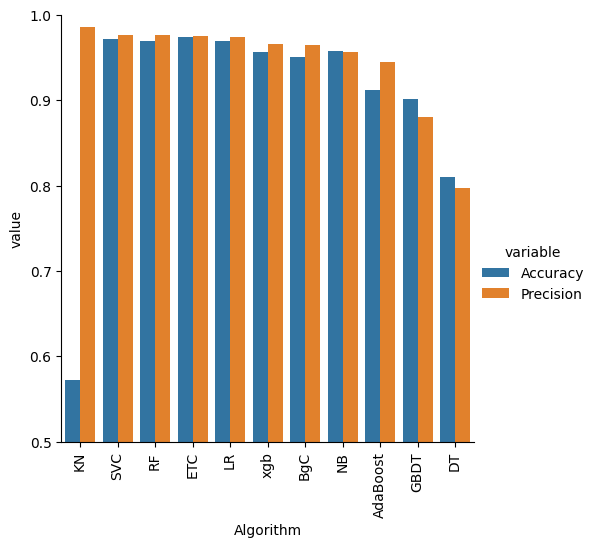

In [74]:


sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()



In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [77]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [78]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [79]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [80]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.571836,0.986130,0.571836,0.986130,0.571836,0.986130,0.571836,0.986130
1,SVC,0.972349,0.976902,0.972349,0.976902,0.972349,0.976902,0.972349,0.976902
2,RF,0.969213,0.976353,0.969213,0.976353,0.969213,0.976353,0.969213,0.976353
3,ETC,0.973774,0.975236,0.973774,0.975236,0.973774,0.975236,0.973774,0.975236
4,LR,0.969213,0.974196,0.969213,0.974196,0.969213,0.974196,0.969213,0.974196
5,xgb,0.956100,0.965894,0.956100,0.965894,0.956100,0.965894,0.956100,0.965894
6,BgC,0.951254,0.964351,0.951254,0.964351,0.951254,0.964351,0.951254,0.964351
7,NB,0.957241,0.956425,0.957241,0.956425,0.957241,0.956425,0.957241,0.956425
8,AdaBoost,0.912486,0.944653,0.912486,0.944653,0.912486,0.944653,0.912486,0.944653
9,GBDT,0.901653,0.880426,0.901653,0.880426,0.901653,0.880426,0.901653,0.880426


In [81]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
lrc = LogisticRegression(solver='liblinear', penalty='l1')

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm', svc), ('lr', lrc), ('et', etc)],voting='soft')

In [83]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear')),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [84]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9771949828962372
Precision 0.980969642048029


In [98]:


import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(voting,open('voting_model.pkl','wb'))

